In [1]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/ss5399/Desktop/reader/formatted_files/160605_234703_AEROFLEX_E500_RRCSTATS_00-1_0001_updated_.csv", low_memory = False)
df.head()

,#State,Time,UE ID,SFN,Cell ID,Cell Frequency(MHz),Attached UEs,Connected UEs,Inactive UEs,Idle UEs,...,RRC Connection Release Request Count,Total: RRC Connection Release Request Count,RRC Connection Reject Count,Total: RRC Connection Reject Count,RRC Paging Request Count,RRC Paging Idle Success Count,RRC Paging Idle Failure Count,RRC Measurement Report Request Count,Total: RRC Measurement Report Request Count,Unnamed: 46
0,0,23:47:03:207,0.0,-,-,-,0.0,0.0,0.0,0.0,...,0,0.0,0,0,0,0,0,0,0.0,NaN
1,0,23:47:03:707,0.0,-,-,-,0.0,0.0,0.0,0.0,...,0,0.0,0,0,0,0,0,0,0.0,NaN
2,0,23:47:04:207,0.0,-,-,-,0.0,0.0,0.0,0.0,...,0,0.0,0,0,0,0,0,0,0.0,NaN
3,0,23:47:04:707,0.0,-,-,-,0.0,0.0,0.0,0.0,...,0,0.0,0,0,0,0,0,0,0.0,NaN
4,0,23:47:05:207,0.0,-,-,-,0.0,0.0,0.0,0.0,...,0,0.0,0,0,0,0,0,0,0.0,NaN


In [3]:
df = df[df["#State"] == 0]
df = df[['Time','Connected UEs' ,'Total: RRC Connection Request Request Count', 'Total: RRC Connection Request Success Count', 'Total: RRC Connection Request Failure Count']]

In [4]:
df['Total: RRC Connection Request Success Count'] = df['Total: RRC Connection Request Success Count'].div(df['Total: RRC Connection Request Request Count'])
df.loc[:,'Total: RRC Connection Request Success Count'] *= 100
df = df[['Time','Connected UEs', 'Total: RRC Connection Request Success Count']]
df.columns = ['Time','Connected UEs', 'Total: RRC Connection Request Success Rate']
df

,Time,Connected UEs,Total: RRC Connection Request Success Rate
0,23:47:03:207,0.0,NaN
1,23:47:03:707,0.0,NaN
2,23:47:04:207,0.0,NaN
3,23:47:04:707,0.0,NaN
4,23:47:05:207,0.0,NaN
5,23:47:05:707,0.0,NaN
6,23:47:06:207,0.0,NaN
7,23:47:06:707,0.0,NaN
8,23:47:07:207,0.0,NaN
9,23:47:07:707,0.0,NaN


In [5]:
df=df.groupby(pd.qcut(df.index,180, labels=range(180))).mean()

In [6]:
df

,Connected UEs,Total: RRC Connection Request Success Rate
0,1.421488,100.000000
1,13.466667,99.990637
2,57.216667,99.744135
3,120.727273,99.857795
4,179.725000,99.969433
5,238.950000,99.995398
6,299.750000,99.968057
7,326.884298,99.502533
8,366.025000,99.316777
9,421.591667,99.399546


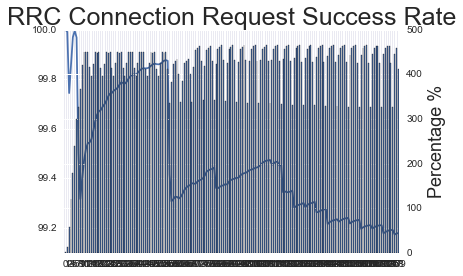

In [14]:
my_plot = df['Total: RRC Connection Request Success Rate'].plot(kind='line', legend=False)
ax2 = my_plot.twinx()
my_plot = df['Connected UEs'].plot(kind='bar',ax=ax2, legend=False)
my_plot.set_title('RRC Connection Request Success Rate', fontsize=25)
#ax2.set_ylim(ymin=300)
label = my_plot.set_xlabel('Time (min)', fontsize=20)
#my_plot.xaxis.set_label_coords(1.05, -1)
my_plot.set_ylabel('Percentage %', fontsize=18)
#my_plot.set_xticks([1, 5, 10])
#fig = my_plot.get_figure()
#mpld3.save_html(fig, 'templates/'+self.name+'.html')
#fig.savefig('graphs/' + self.name+'.png')